In [1]:
# !pip3 install medpy -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip3 install nibabel -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip3 install pynrrd -i https://pypi.tuna.tsinghua.edu.cn/simple

In [2]:
# cd dataloaders
# 执行:CTM_data_processing-sitk.ipynb
# 备注:和UA-MT以及VNet共用一个数据预处理程序,若已经运行过,则不必要在重复运行

In [3]:
# import os
# os.getcwd() #获取当前工作目录路径

In [4]:
# !python3 train_UAMT_CTM.py --gpu "2"  --max_iterations 6000

In [5]:
!python3 test_UAMT_CTM.py --gpu '0'

2021-03-15 03:44:27.455842: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
init weight from ../model/UAMT_CTM/iter_10000.pth
  0%|                                                    | 0/36 [00:00<?, ?it/s]2, 2, 2
np.unique(gt): [0 1 2]
B1756747 :
single_metric: ([0.9946180881142407, 0.9244922406540879, 0.8959552953698776], [0.9892937960746387, 0.8595867697099026, 0.8115208483972042], [1.0, 2.8284271247461903, 1.4142135623730951], [0.11841890226367888, 0.5438137699391395, 0.4705537875491211])
  3%|█▏                                          | 1/36 [00:05<03:22,  5.79s/it]2, 2, 2
np.unique(gt): [0 1 2]
1735950 :
single_metric: ([0.9957332737151161, 0.9356678155133021, 0.8351438462456727], [0.9915028026455324, 0.8791125826609786, 0.7169501947120311], [1.0, 2.0, 2.23606797749979], [0.11374661892774361, 0.6545413707476666, 0.7625615749034695])
  6%|██▍                                         | 2/36 [00:08<02:41,  4.76s/i

 61%|██████████████████████████▎                | 22/36 [01:21<01:04,  4.62s/it]2, 2, 2
np.unique(gt): [0 1 2]
B1521755 :
single_metric: ([0.996224422523773, 0.9459125353198048, 0.9237334633908432], [0.9924772477813818, 0.897375755821923, 0.858275744873683], [1.0, 1.7320508075688772, 1.4142135623730951], [0.098168549746297, 0.5101151548719632, 0.3475082756100967])
 64%|███████████████████████████▍               | 23/36 [01:24<00:52,  4.05s/it]2, 2, 1
np.unique(gt): [0 1 2]
1371504 :
single_metric: ([0.9935945851915109, 0.8981143107732787, 0.8729545454545454], [0.9872707067862746, 0.815070310427169, 0.7745513208308127], [1.0, 2.8284271247461903, 1.4142135623730951], [0.1630465855519041, 1.7606206032686416, 0.7068220668711493])
 67%|████████████████████████████▋              | 24/36 [01:26<00:40,  3.38s/it]2, 2, 2
np.unique(gt): [0 1 2]
B825869 :
single_metric: ([0.9928351304390122, 0.9239756448352985, 0.6653281465679508], [0.9857722012005623, 0.8586939881057528, 0.4984956750658142], [1.

# 后处理

## dice/jc/hd/asd的violin图/箱图

Unnamed: 0_level_0      dice                            jc            \
  Unnamed: 0_level_1        bg      dura        SC        bg      dura   
0           B1756747  0.994618  0.924492  0.895955  0.989294  0.859587   
1            1735950  0.995733  0.935668  0.835144  0.991503  0.879113   
2           B1632110  0.996392  0.938110  0.927580  0.992809  0.883435   
3            b930124  0.994703  0.932150  0.721949  0.989462  0.872922   
4           B1536553  0.994232  0.950004  0.910091  0.988530  0.904769   

              hd                           asd                      
         SC   bg      dura        SC        bg      dura        SC  
0  0.811521  1.0  2.828427  1.414214  0.118419  0.543814  0.470554  
1  0.716950  1.0  2.000000  2.236068  0.113747  0.654541  0.762562  
2  0.864941  1.0  2.236068  1.000000  0.078348  0.372975  0.397720  
3  0.564883  1.0  2.449490  5.099020  0.189315  1.234507  1.554180  
4  0.835016  1.0  2.000000  1.732051  0.147240  0.911275  0.646954

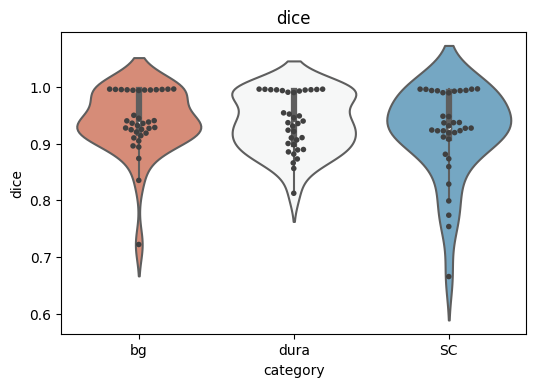

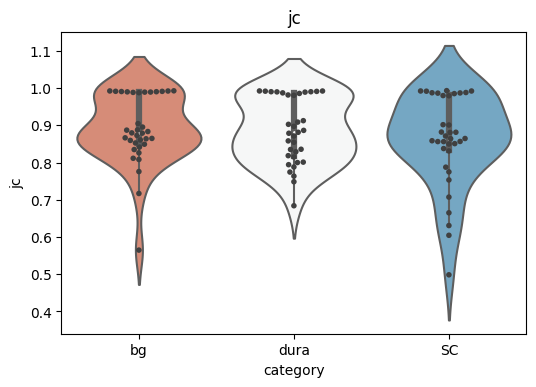

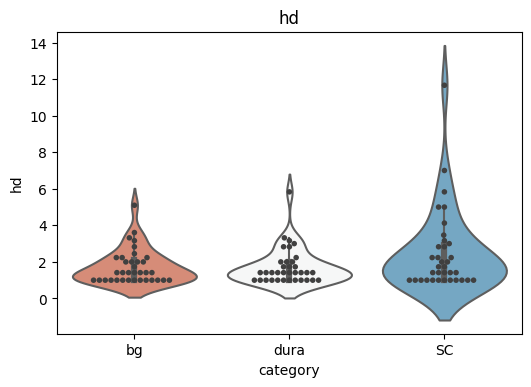

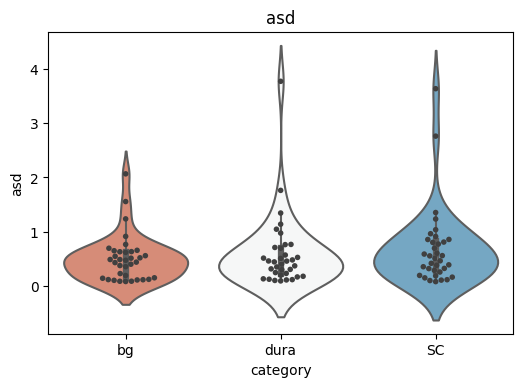

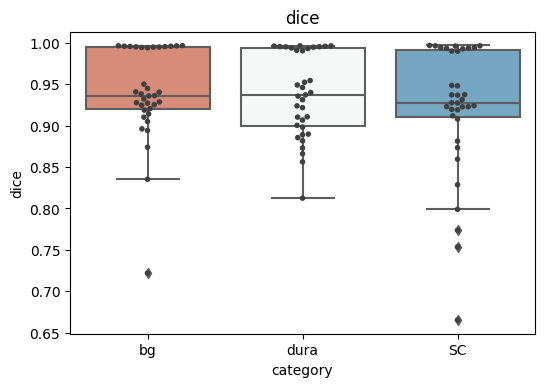

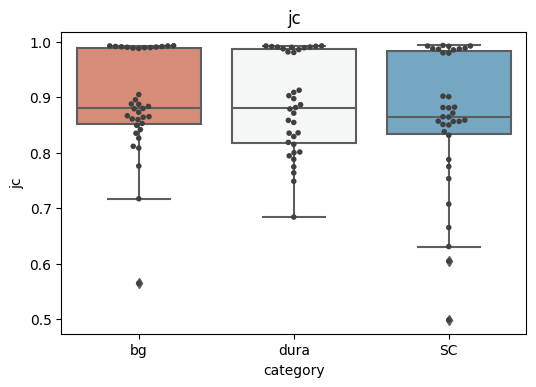

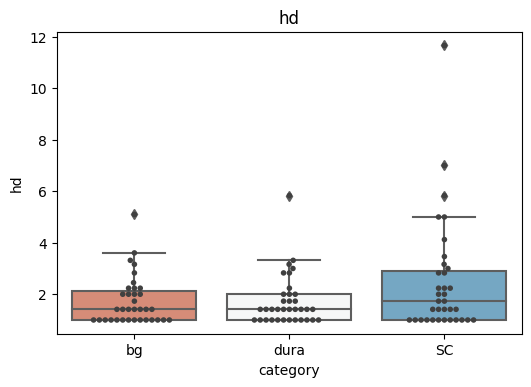

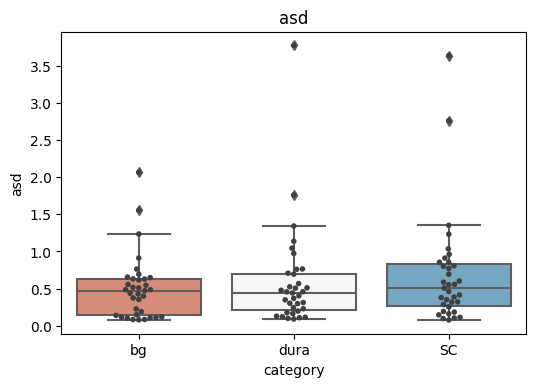

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from post_utils import get_proc_df, get_voilinplot, get_boxplot, get_images, imshow

name_classes = ['bg','dura','SC']
results_dir = "../model/prediction/UAMT_CTM_post"
filename = "../model/prediction/UAMT_CTM_post/metrics_test_set.csv"
results_raw = pd.read_csv(filename,header=[0,1])
display(results_raw.head())

# 删除异常样本
results_raw = results_raw.drop(results_raw[results_raw[('dice','SC')]<0.65].index)


# violinplot:
filename = os.path.join(results_dir,'voilinplot of pred dice on test-set.png')
proc_df = get_proc_df(results_raw,metric='dice',name_classes=name_classes)
get_voilinplot(proc_df,'dice',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred jc on test-set.png')
proc_df = get_proc_df(results_raw,metric='jc',name_classes=name_classes)
get_voilinplot(proc_df,'jc',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred hd on test-set.png')
proc_df = get_proc_df(results_raw,metric='hd',name_classes=name_classes)
get_voilinplot(proc_df,'hd',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred asd on test-set.png')
proc_df = get_proc_df(results_raw,metric='asd',name_classes=name_classes)
get_voilinplot(proc_df,'asd',name_classes,filename)


# boxplot:
filename = os.path.join(results_dir,'voilinplot of pred dice on test-set.png')
proc_df = get_proc_df(results_raw,metric='dice',name_classes=name_classes)
get_boxplot(proc_df,'dice',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred jc on test-set.png')
proc_df = get_proc_df(results_raw,metric='jc',name_classes=name_classes)
get_boxplot(proc_df,'jc',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred hd on test-set.png')
proc_df = get_proc_df(results_raw,metric='hd',name_classes=name_classes)
get_boxplot(proc_df,'hd',name_classes,filename)

filename = os.path.join(results_dir,'voilinplot of pred asd on test-set.png')
proc_df = get_proc_df(results_raw,metric='asd',name_classes=name_classes)
get_boxplot(proc_df,'asd',name_classes,filename)

## 画自动分割mask对比图

patients
 ['B1756747' '1735950' 'B1632110' 'b930124' 'B1536553' 'B928647' '1182723'
 '1261721' '1352900' 'B1182723' '643486' 'b936932-dingzi' 'B1694915'
 'B1006763' '1678746' 'B1424004' 'B1328036' 'B1425167' '945286'
 'b1460036-thoracic' 'B759663' 'B1521755' '1371504' 'B825869' 'B1352900'
 'B976555' '840383' 'B805736' 'b1427578' '1700637-neck' 'B1330032'
 '1027338' '772230' 'B617407' '820056']
images.shape:
 (30, 1, 140, 140)


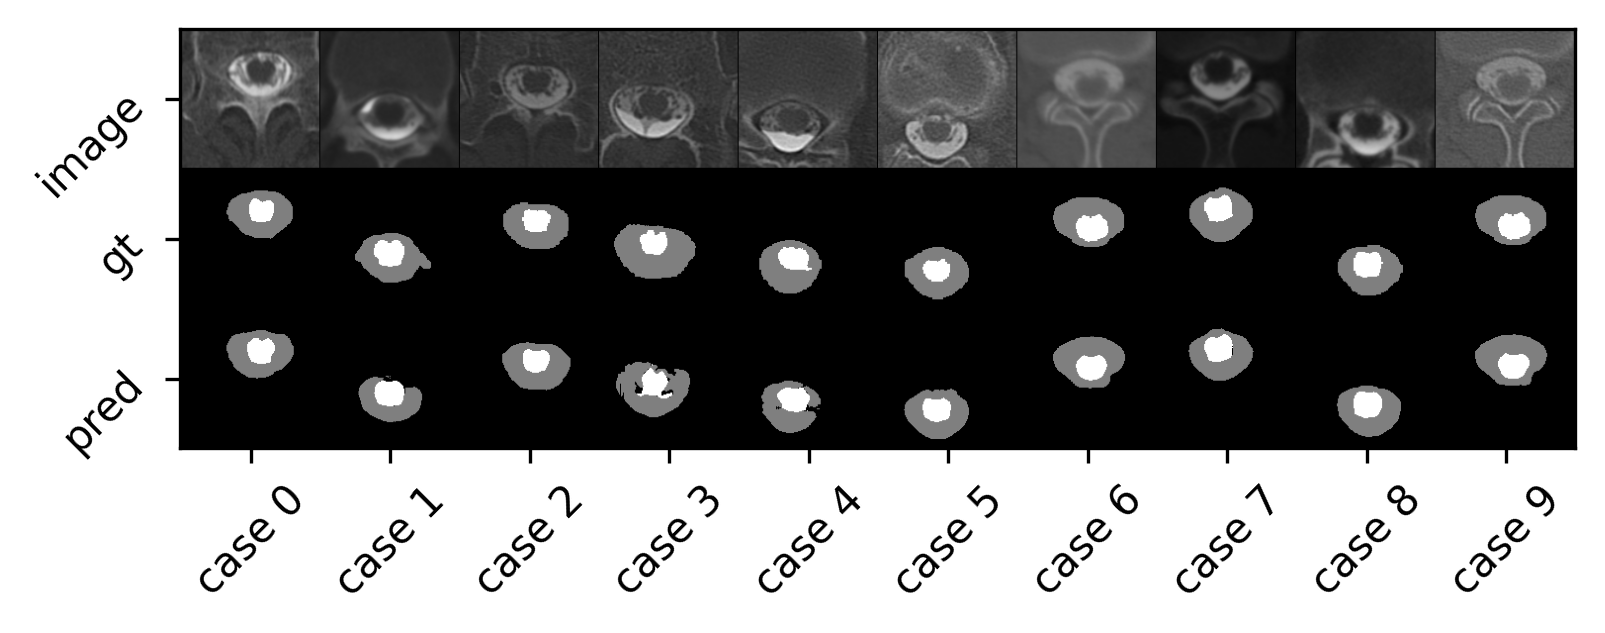

In [37]:
import torchvision

patients = results_raw[('Unnamed: 0_level_0','Unnamed: 0_level_1')].values
print("patients\n",patients)
# get images
n_case = 10
images = get_images(results_dir,patients[:n_case])
# show images
imshow(torchvision.utils.make_grid(images, nrow=3, padding=1), 
       n_case=n_case,
       filename=os.path.join(results_dir,'pred_mask vs gt_mask.png')
      )